## Income Statement Analysis 
Purpose:
1. Creating this notebook to document what is important in a business's income statement
2. Determine whether company's economics are healthy enough before pursuing more research

### How to use
1. Run statement_etl.py to gather Stock Statements (alter API link to gather different statements) 
2. Run Stock Specific Analysis IPYNB for quick analysis
3. Read SEC filings for more detailed information

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 500)

plt.rc('figure', figsize=(16, 6))

sns.set(context='notebook', style = 'ticks', rc={'figure.figsize': (16,6)})

np.set_printoptions(precision=4, suppress=True)

In [2]:
stock = 'AAPL'

In [3]:
df = pd.read_json('./stocks/{0}/INCOMESTATEMENT_YR_{0}.json'.format(stock))

In [4]:
# rearrange columns
df = df[['date', 'symbol', 'fillingDate', 'acceptedDate', 'period', 'revenue', 'costOfRevenue', 'grossProfit',
   'grossProfitRatio', 'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses', 
   'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses', 'costAndExpenses', 'interestExpense',
   'depreciationAndAmortization', 'ebitda', 'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio', 
   'totalOtherIncomeExpensesNet', 'incomeBeforeTax', 'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
   'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut', 'weightedAverageShsOutDil', 'link', 'finalLink']]

### Income Statement
Income statement tell the investor the result of the company's operations for a set period of time. They are reported for each three-month period and at the end of the year.

Income statement composes of three components
    1. Revenue
    2. Expenses 
    3. Net Earnings

| Term                           | Description                                                                                                                                                                                             |
|:--------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Revenue                        | Total amount of money to company                                                                                                                                                                        |
| Cost of Revenue                | Cost of purchasing the goods the company is reselling or the cost of materials and labor used in manufacturing products it is selling                                                                   |
| Gross Profit                   | Revenue - Cost of Revenue                                                                                                                                                                               |
| Gross Margin                   | Gross Profit / Revenue                                                                                                                                                                                  |
| Operating Expense              | Costs consisting of selling/admin, R&D, depreciation, amortization, etc. required for operations                                                                                                        |
| Selling, General & Admin (SGA) | Costs for direct and indirect selling expenses and all general and administrative expenses. These costs include management salaries, advertising, travel costs, legal fees, commissions, payroll, etc.  |
| Research and Development       | Costs for researching, innovating, and improving products                                                                                                                                               |
| Depreciation                   | Costs for machinery/buildings aging over time                                                                                                                                                           |
| EBITDA                         | Earnings Before Income Tax, Depreciation, Amortization                                                                                                                                                  |
| Interest Expense               | Interest paid out on debt the company carries on balance sheet (financial cost)                                                                                                                         |
| Gain/Loss Sales Asset          | Earnings when selling company assets (buildings, machines, etc. that are not inventory)                                                                                                                 |
| Other                          | Similar to Gain/Loss Sales asset but these assets are infrequent and unusual (licensing agreements, sales patents, etc.)                                                                                |
| Income before tax              | Company's income after all expenses, but before taxes subtracted                                                                                                                                        |
| Net Earnings                   | After Expenses and taxes are subtracted from company's revenue                                                                                                                                          |
| Earnings per Share             | Net Earnings / Outstanding shares                                                                                                                                                                       |

In [5]:
df['my'] = df['date'].apply(lambda s: s.strftime("%b %y"))
df = df.set_index('my')
df = df.sort_values('date')

In [6]:
# Revenues
df['revenue_mil'] = df['revenue']/1000000
df['costOfRevenue_mil'] = df['costOfRevenue']/1000000
df['grossProfit_mil'] = df['grossProfit']/1000000

# Operating Income & Expenses
df['researchAndDevelopmentExpenses_mil'] = df['researchAndDevelopmentExpenses']/1000000
df['generalAndAdministrativeExpenses_mil'] = df['generalAndAdministrativeExpenses']/1000000
df['sellingAndMarketingExpenses_mil'] = df['sellingAndMarketingExpenses']/1000000
df['otherExpenses_mil'] = df['otherExpenses']/1000000
df['operatingExpenses_mil'] = df['operatingExpenses']/1000000


### Observations of data
Author used KO as a test

**Notes**
1. Ratios are usually x / Revenue

**Deficiencies**
1. Operating Income = Gross Profit - Operating Expenses, in filings "Other Expenses" is not 0, therefore Operating Income number does not match if you try this formula

In [7]:
df.tail()

,date,symbol,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink,revenue_mil,costOfRevenue_mil,grossProfit_mil,researchAndDevelopmentExpenses_mil,generalAndAdministrativeExpenses_mil,sellingAndMarketingExpenses_mil,otherExpenses_mil,operatingExpenses_mil
my,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sep 15,2015-09-26,AAPL,2015-10-28,2015-10-28 16:31:09,FY,233715000000,140089000000,93626000000,0.400599,8067000000,14329000000,0,1285000000,22396000000,162485000000,733000000,11257000000,82487000000,0.352938,71230000000,0.304773,1285000000,72515000000,0.310271,19121000000,53394000000,0.228458,9.28,9.22,5753421000,5793069000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,233715.0,140089.0,93626.0,8067.0,14329.0,0.0,1285.0,22396.0
Sep 16,2016-09-24,AAPL,2016-10-26,2016-10-26 16:42:16,FY,215639000000,131376000000,84263000000,0.390760,10045000000,14194000000,0,1348000000,24239000000,155615000000,1456000000,10505000000,70529000000,0.327070,60024000000,0.278354,1348000000,61372000000,0.284605,15685000000,45687000000,0.211868,8.35,8.31,5470820000,5500281000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,215639.0,131376.0,84263.0,10045.0,14194.0,0.0,1348.0,24239.0
Sep 17,2017-09-30,AAPL,2017-11-03,2017-11-03 08:01:37,FY,229234000000,141048000000,88186000000,0.384699,11581000000,15261000000,0,2745000000,26842000000,167890000000,2323000000,10157000000,71501000000,0.311913,61344000000,0.267604,2745000000,64089000000,0.279579,15738000000,48351000000,0.210924,9.27,9.21,5217242000,5251692000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,229234.0,141048.0,88186.0,11581.0,15261.0,0.0,2745.0,26842.0
Sep 18,2018-09-29,AAPL,2018-11-05,2018-11-05 08:01:40,FY,265595000000,163756000000,101839000000,0.383437,14236000000,16705000000,0,0,30941000000,194697000000,3240000000,10903000000,81801000000,0.307991,70898000000,0.266940,2005000000,72903000000,0.274489,13372000000,59531000000,0.224142,12.01,11.91,4955377000,5000109000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,265595.0,163756.0,101839.0,14236.0,16705.0,0.0,0.0,30941.0
Sep 19,2019-09-28,AAPL,2019-10-31,2019-10-30 18:12:36,FY,260174000000,161782000000,98392000000,0.378178,16217000000,18245000000,0,1807000000,34462000000,196244000000,3576000000,12547000000,76477000000,0.293946,63930000000,0.245720,1807000000,65737000000,0.252666,10481000000,55256000000,0.212381,11.97,11.89,4617834000,4648913000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,260174.0,161782.0,98392.0,16217.0,18245.0,0.0,1807.0,34462.0


## Revenue, Cost of Goods, Gross Profit

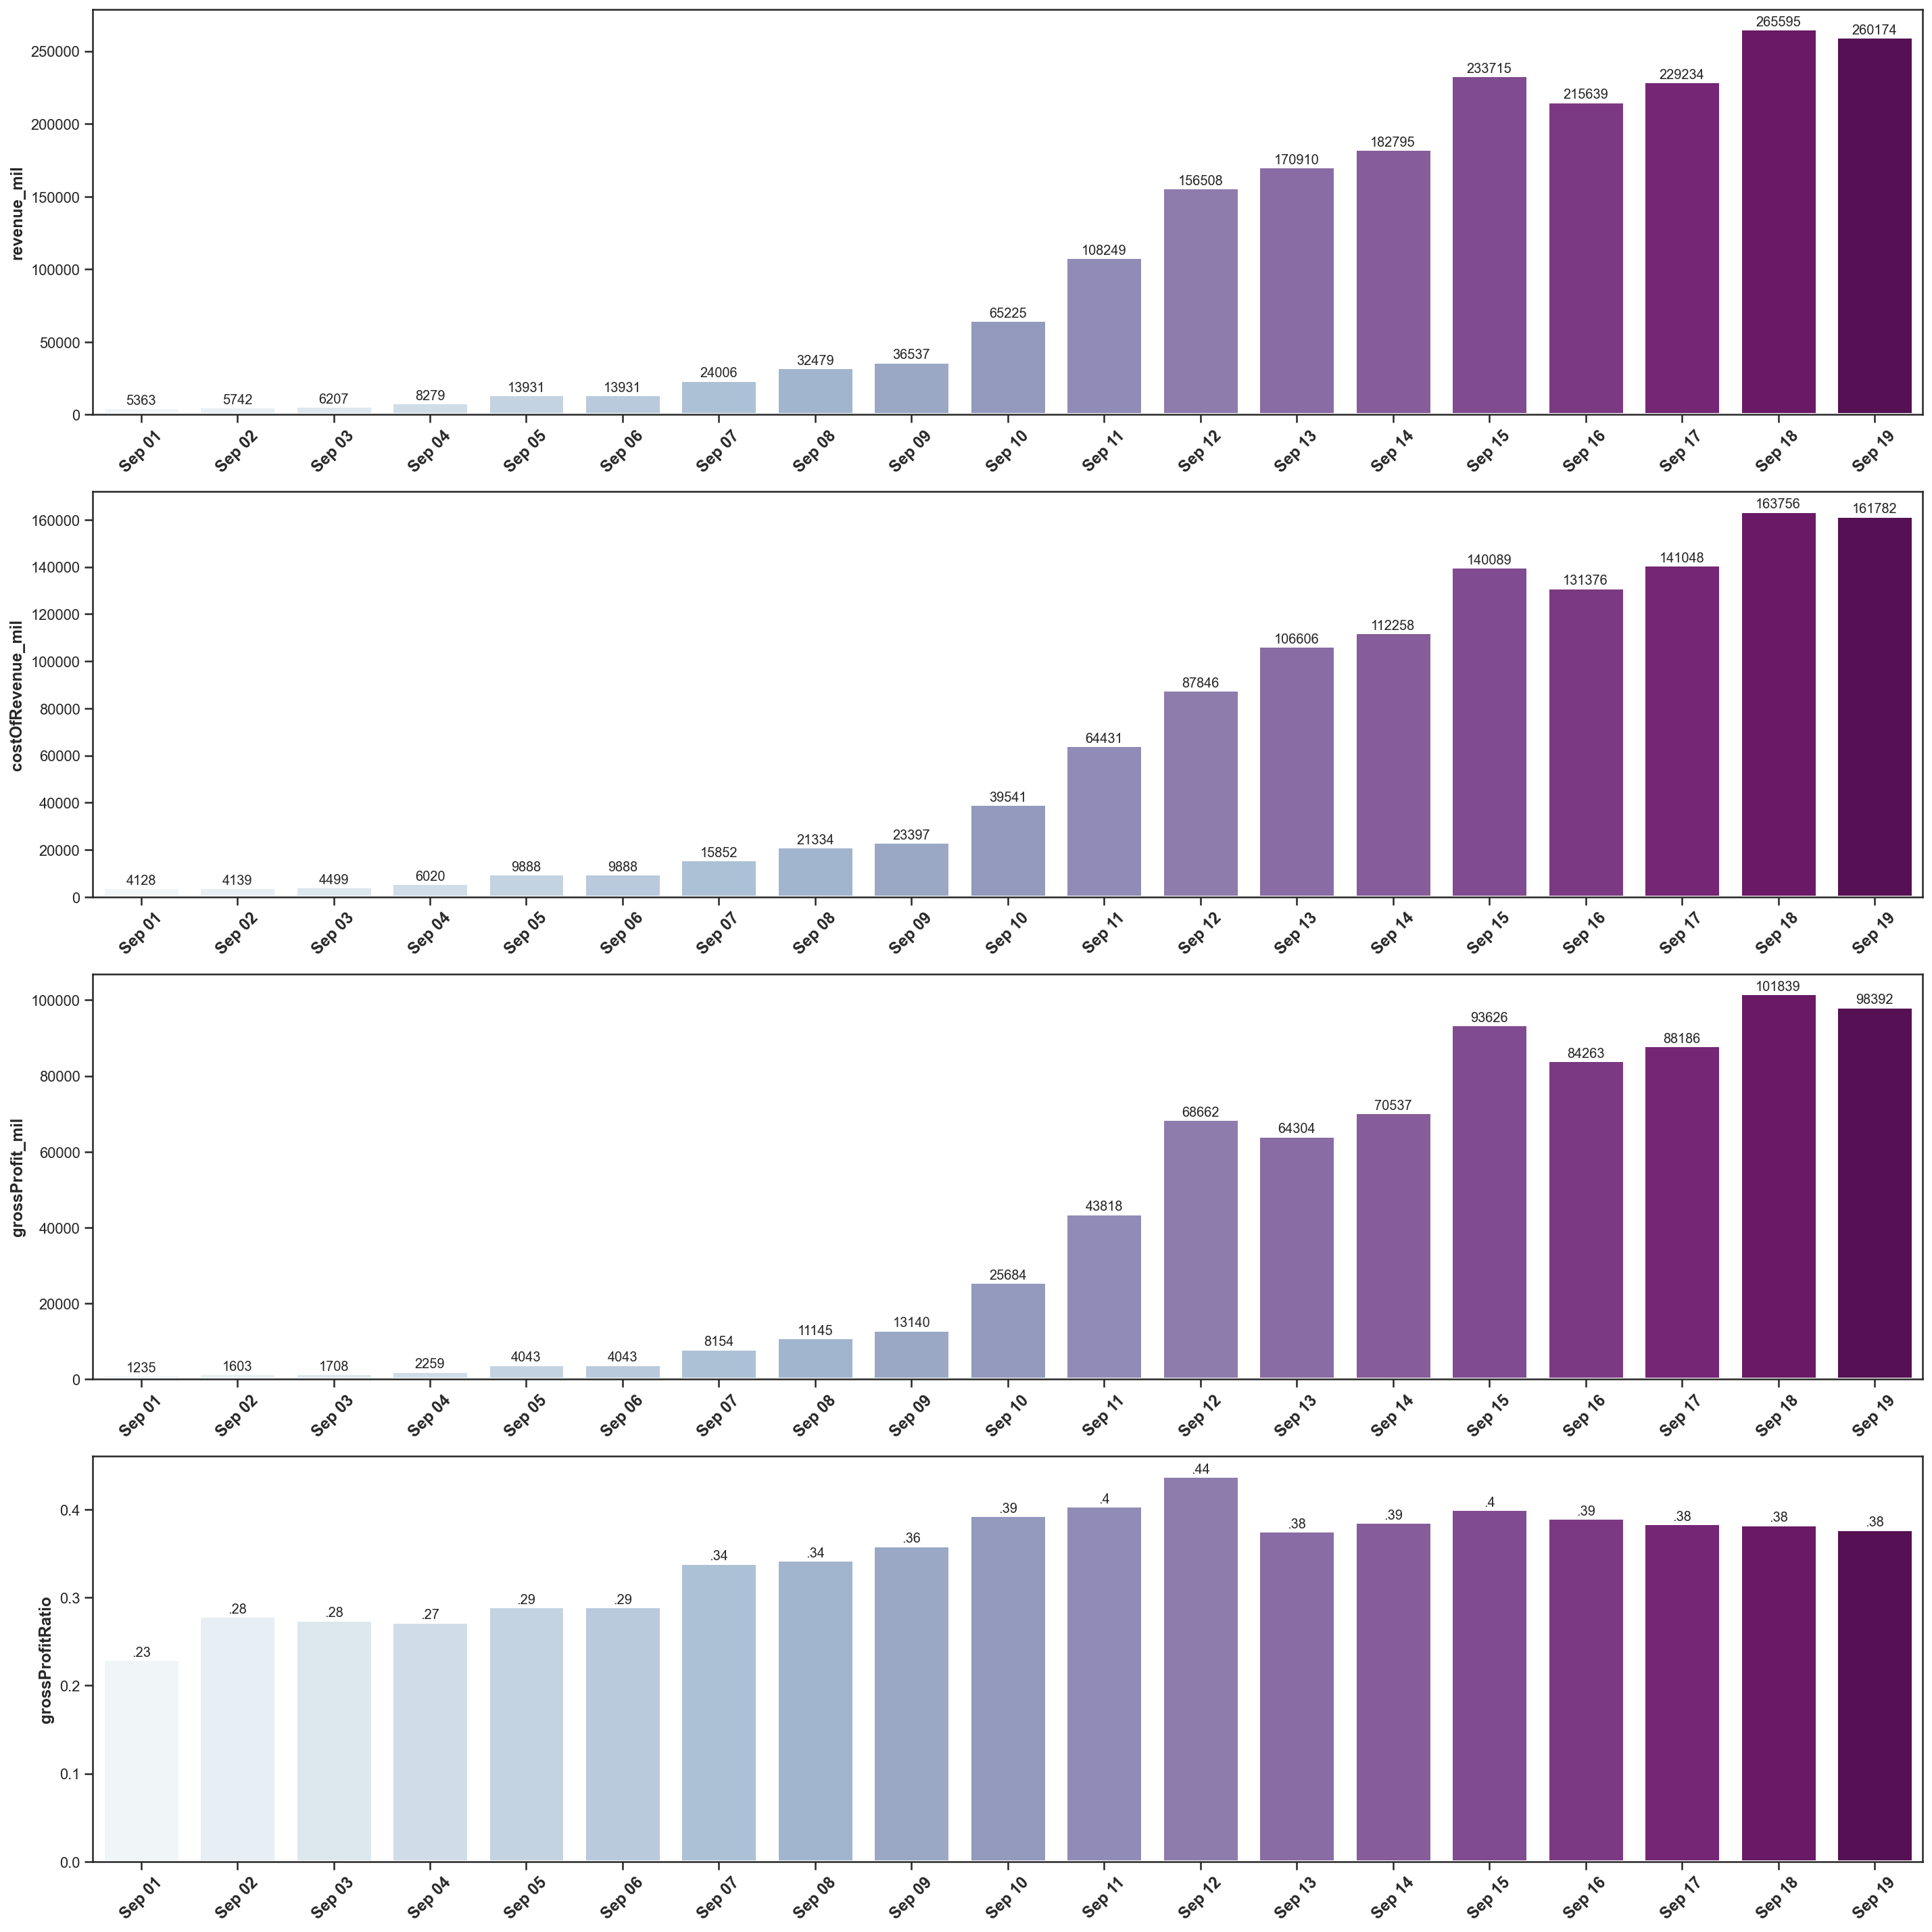

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,20))
fig.subplots_adjust(hspace =.3, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(["revenue_mil", "costOfRevenue_mil","grossProfit_mil", "grossProfitRatio"]):
    plot=sns.barplot(y=col, x=df.index, data=df, palette ="BuPu", ax=axes[i], linewidth = 2.5)
    plot.set_xticklabels(plot.get_xticklabels(),size= 12, rotation=45, fontweight='bold')
    plot.set_ylabel(col,size= 12, fontweight='bold')
    plot.set_xlabel('')
    for p in plot.patches:
        if 'ratio' in col.lower():
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%s' % str(round(float(p.get_height()),2))[1:], 
                fontsize=10, ha='center', va='bottom')
        else: 
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%.0f' % float(p.get_height()), 
                fontsize=10, ha='center', va='bottom')
plt.savefig("./stocks/{0}/_Revenue.png".format(stock), bbox_inches='tight')
plt.tight_layout();

# Expenses

In [9]:
df["generalAndAdministrativeExpenses_ratio"] = df["generalAndAdministrativeExpenses"]/df["operatingExpenses"]
df["researchAndDevelopmentExpenses_ratio"] = df["researchAndDevelopmentExpenses"]/df["operatingExpenses"]
df["sellingAndMarketingExpenses_ratio"] = df["sellingAndMarketingExpenses"]/df["operatingExpenses"]
df["otherExpenses_ratio"] = df["otherExpenses"]/df["operatingExpenses"]

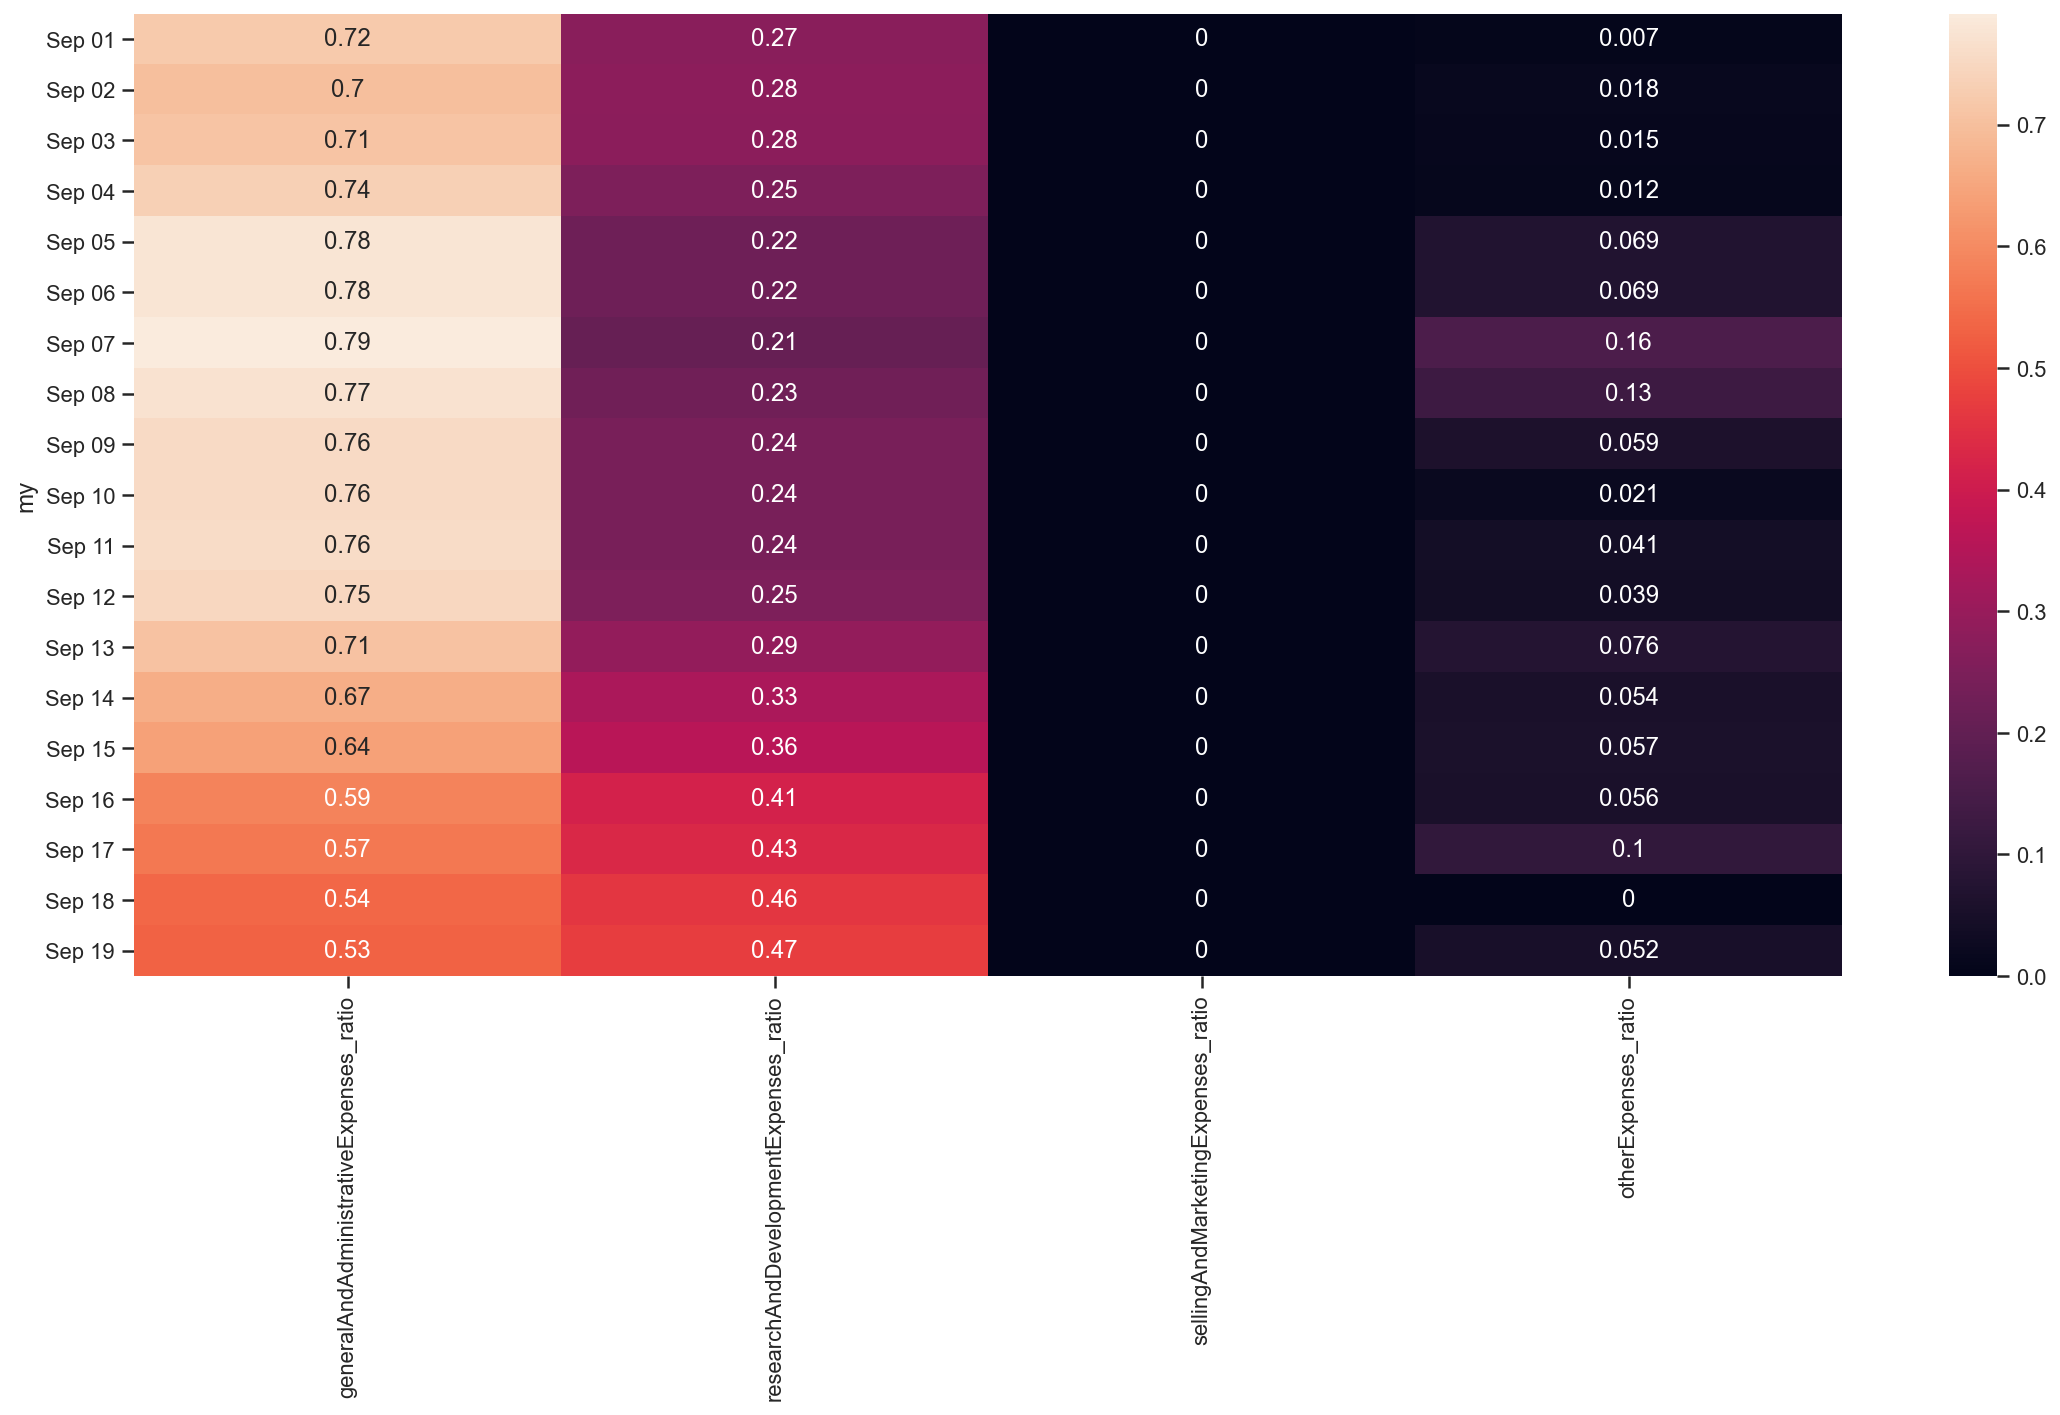

In [10]:
plt.rc('figure', figsize=(16, 10))
sns.heatmap(df[["generalAndAdministrativeExpenses_ratio",
                "researchAndDevelopmentExpenses_ratio", 
                "sellingAndMarketingExpenses_ratio", "otherExpenses_ratio"]],annot=True)
plt.tight_layout();

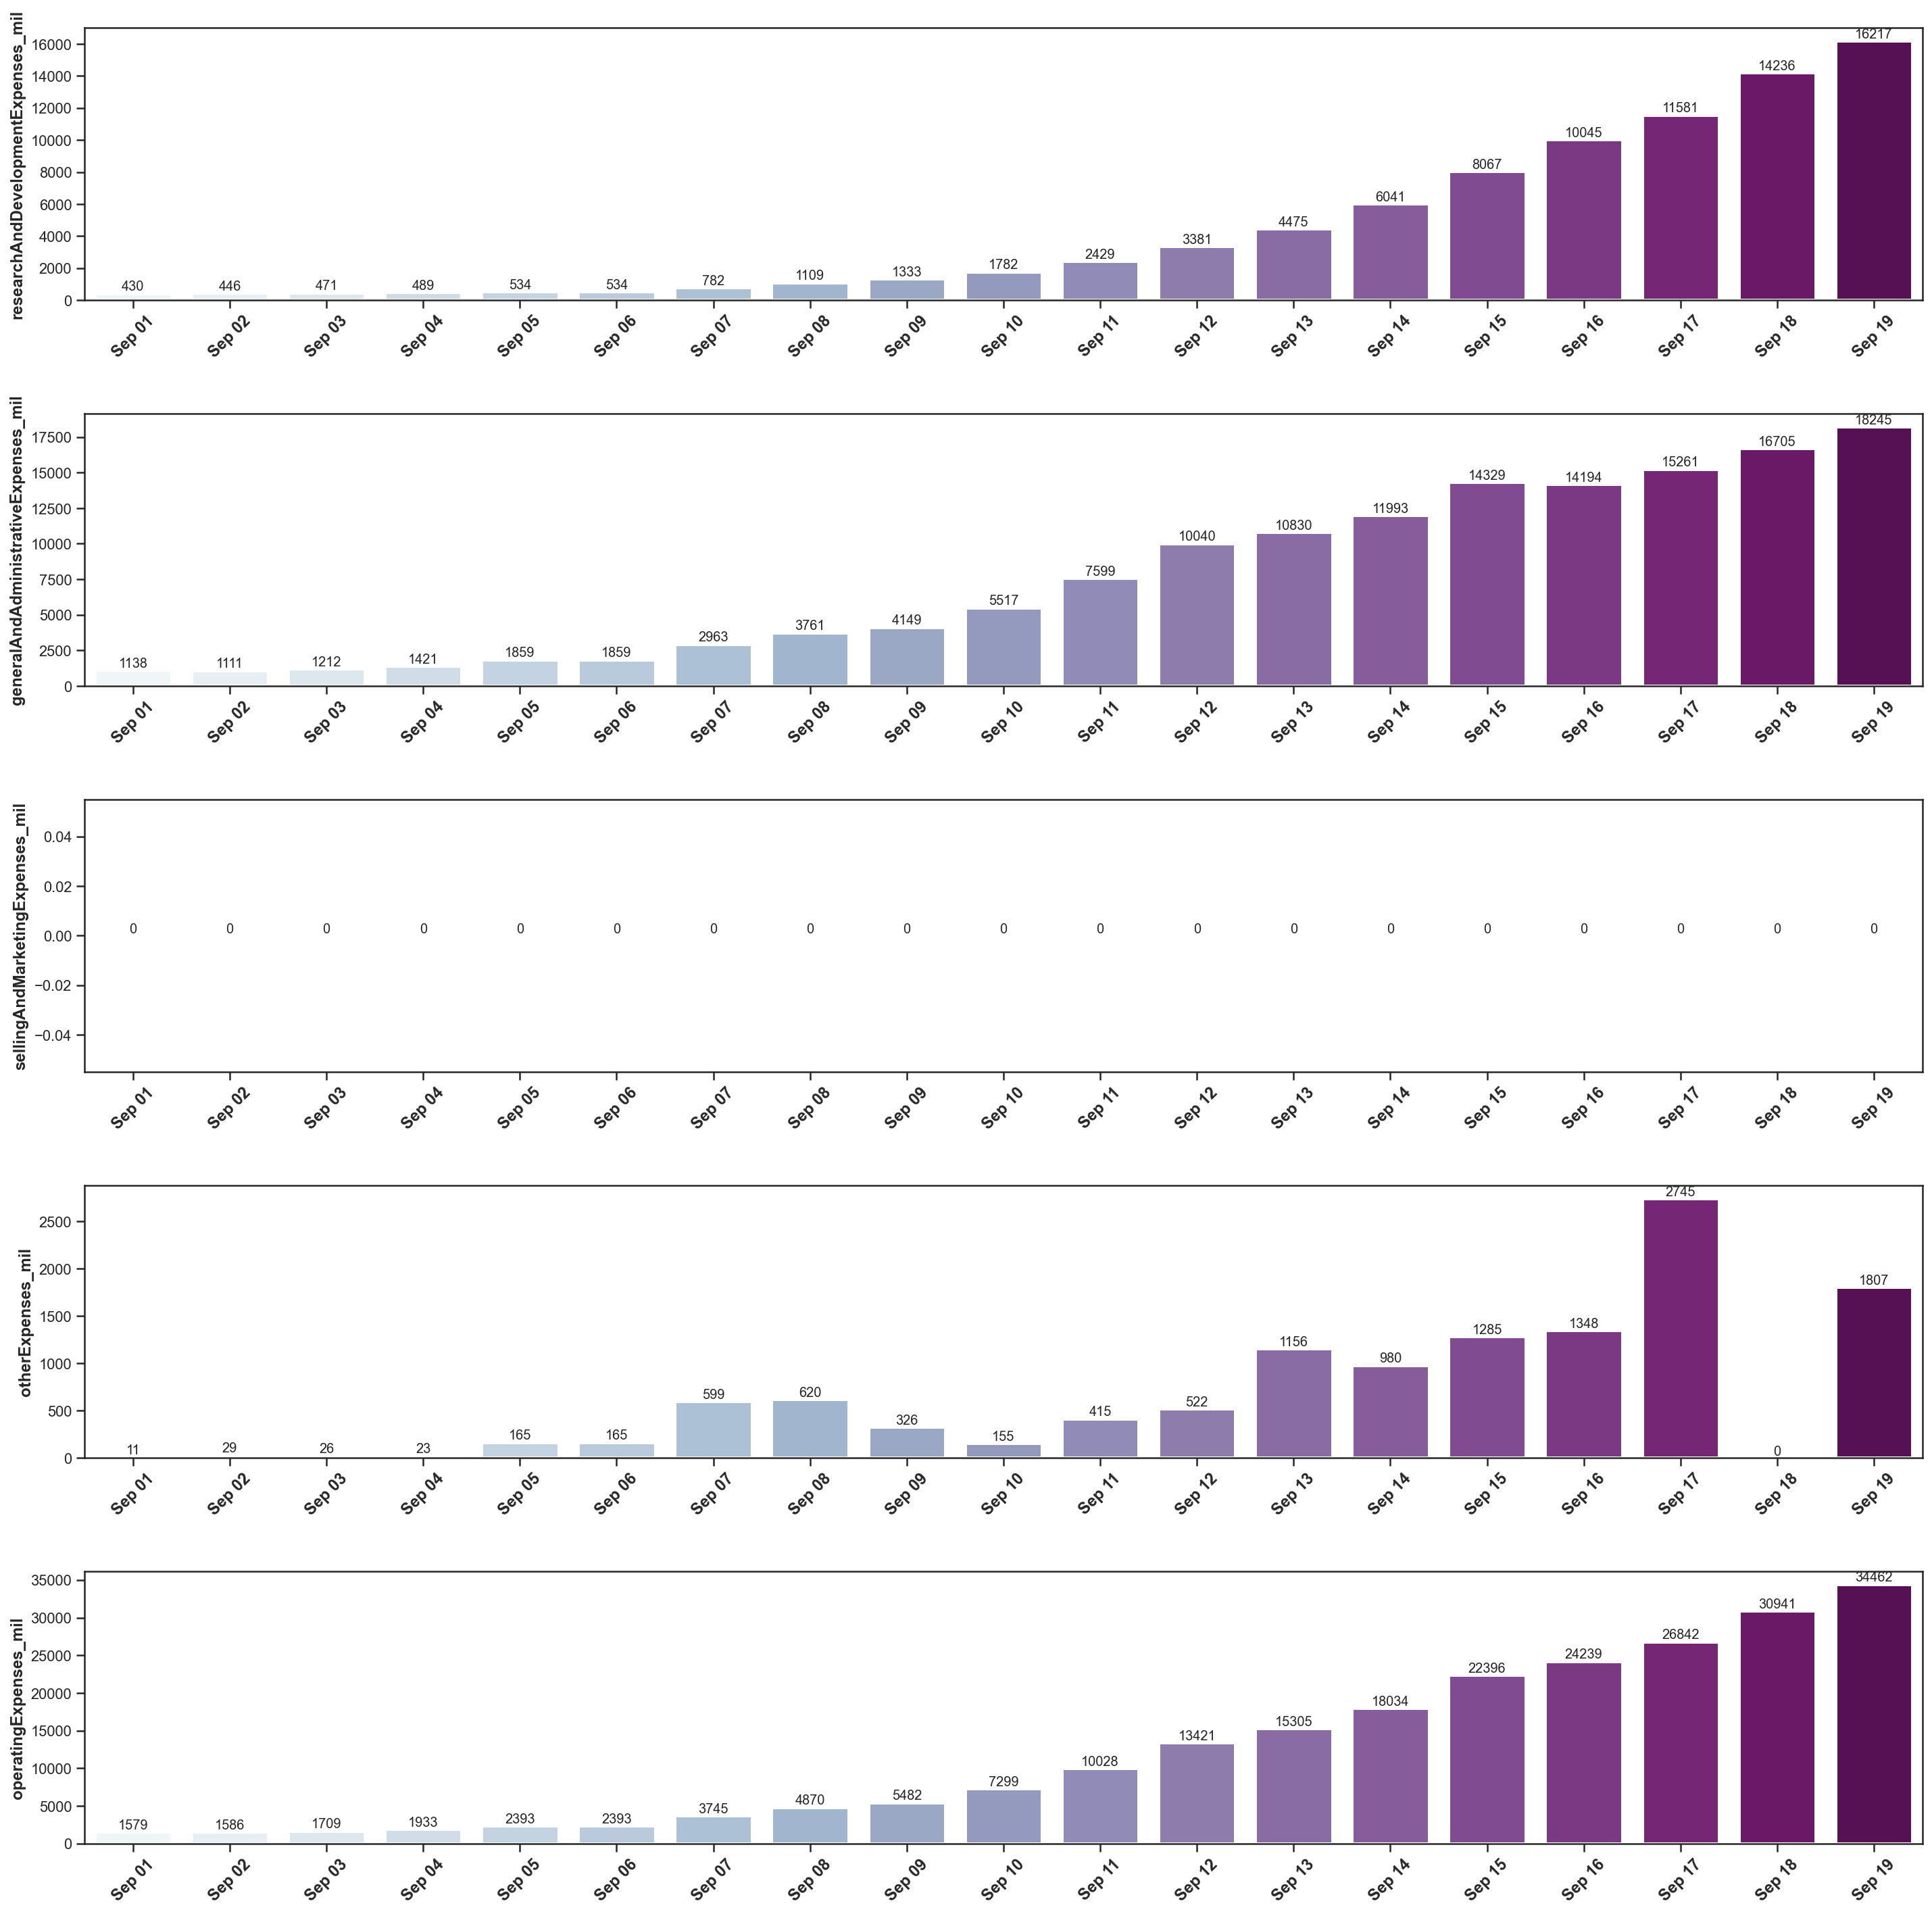

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20,20))
fig.subplots_adjust(hspace =.3, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(["researchAndDevelopmentExpenses_mil", 
                         "generalAndAdministrativeExpenses_mil","sellingAndMarketingExpenses_mil",
                         "otherExpenses_mil", "operatingExpenses_mil"]):
    plot=sns.barplot(y=col, x=df.index, data=df, palette ="BuPu", ax=axes[i], linewidth = 2.5)
    plot.set_xticklabels(plot.get_xticklabels(),size= 12, rotation=45, fontweight='bold')
    plot.set_ylabel(col,size= 12, fontweight='bold')
    plot.set_xlabel('')
    for p in plot.patches:
        if 'ratio' in col.lower():
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%s' % str(round(float(p.get_height()),2))[1:], 
                fontsize=10, ha='center', va='bottom')
        else: 
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%.0f' % float(p.get_height()), 
                fontsize=10, ha='center', va='bottom')
plt.savefig("./stocks/{0}/_Expenses.png".format(stock))
plt.tight_layout();

## Net Earnings
Basic EPS considers only issued and outstanding Common shares of company
(Issued shares distributed to public vs outstanding shares are within the corporation) 

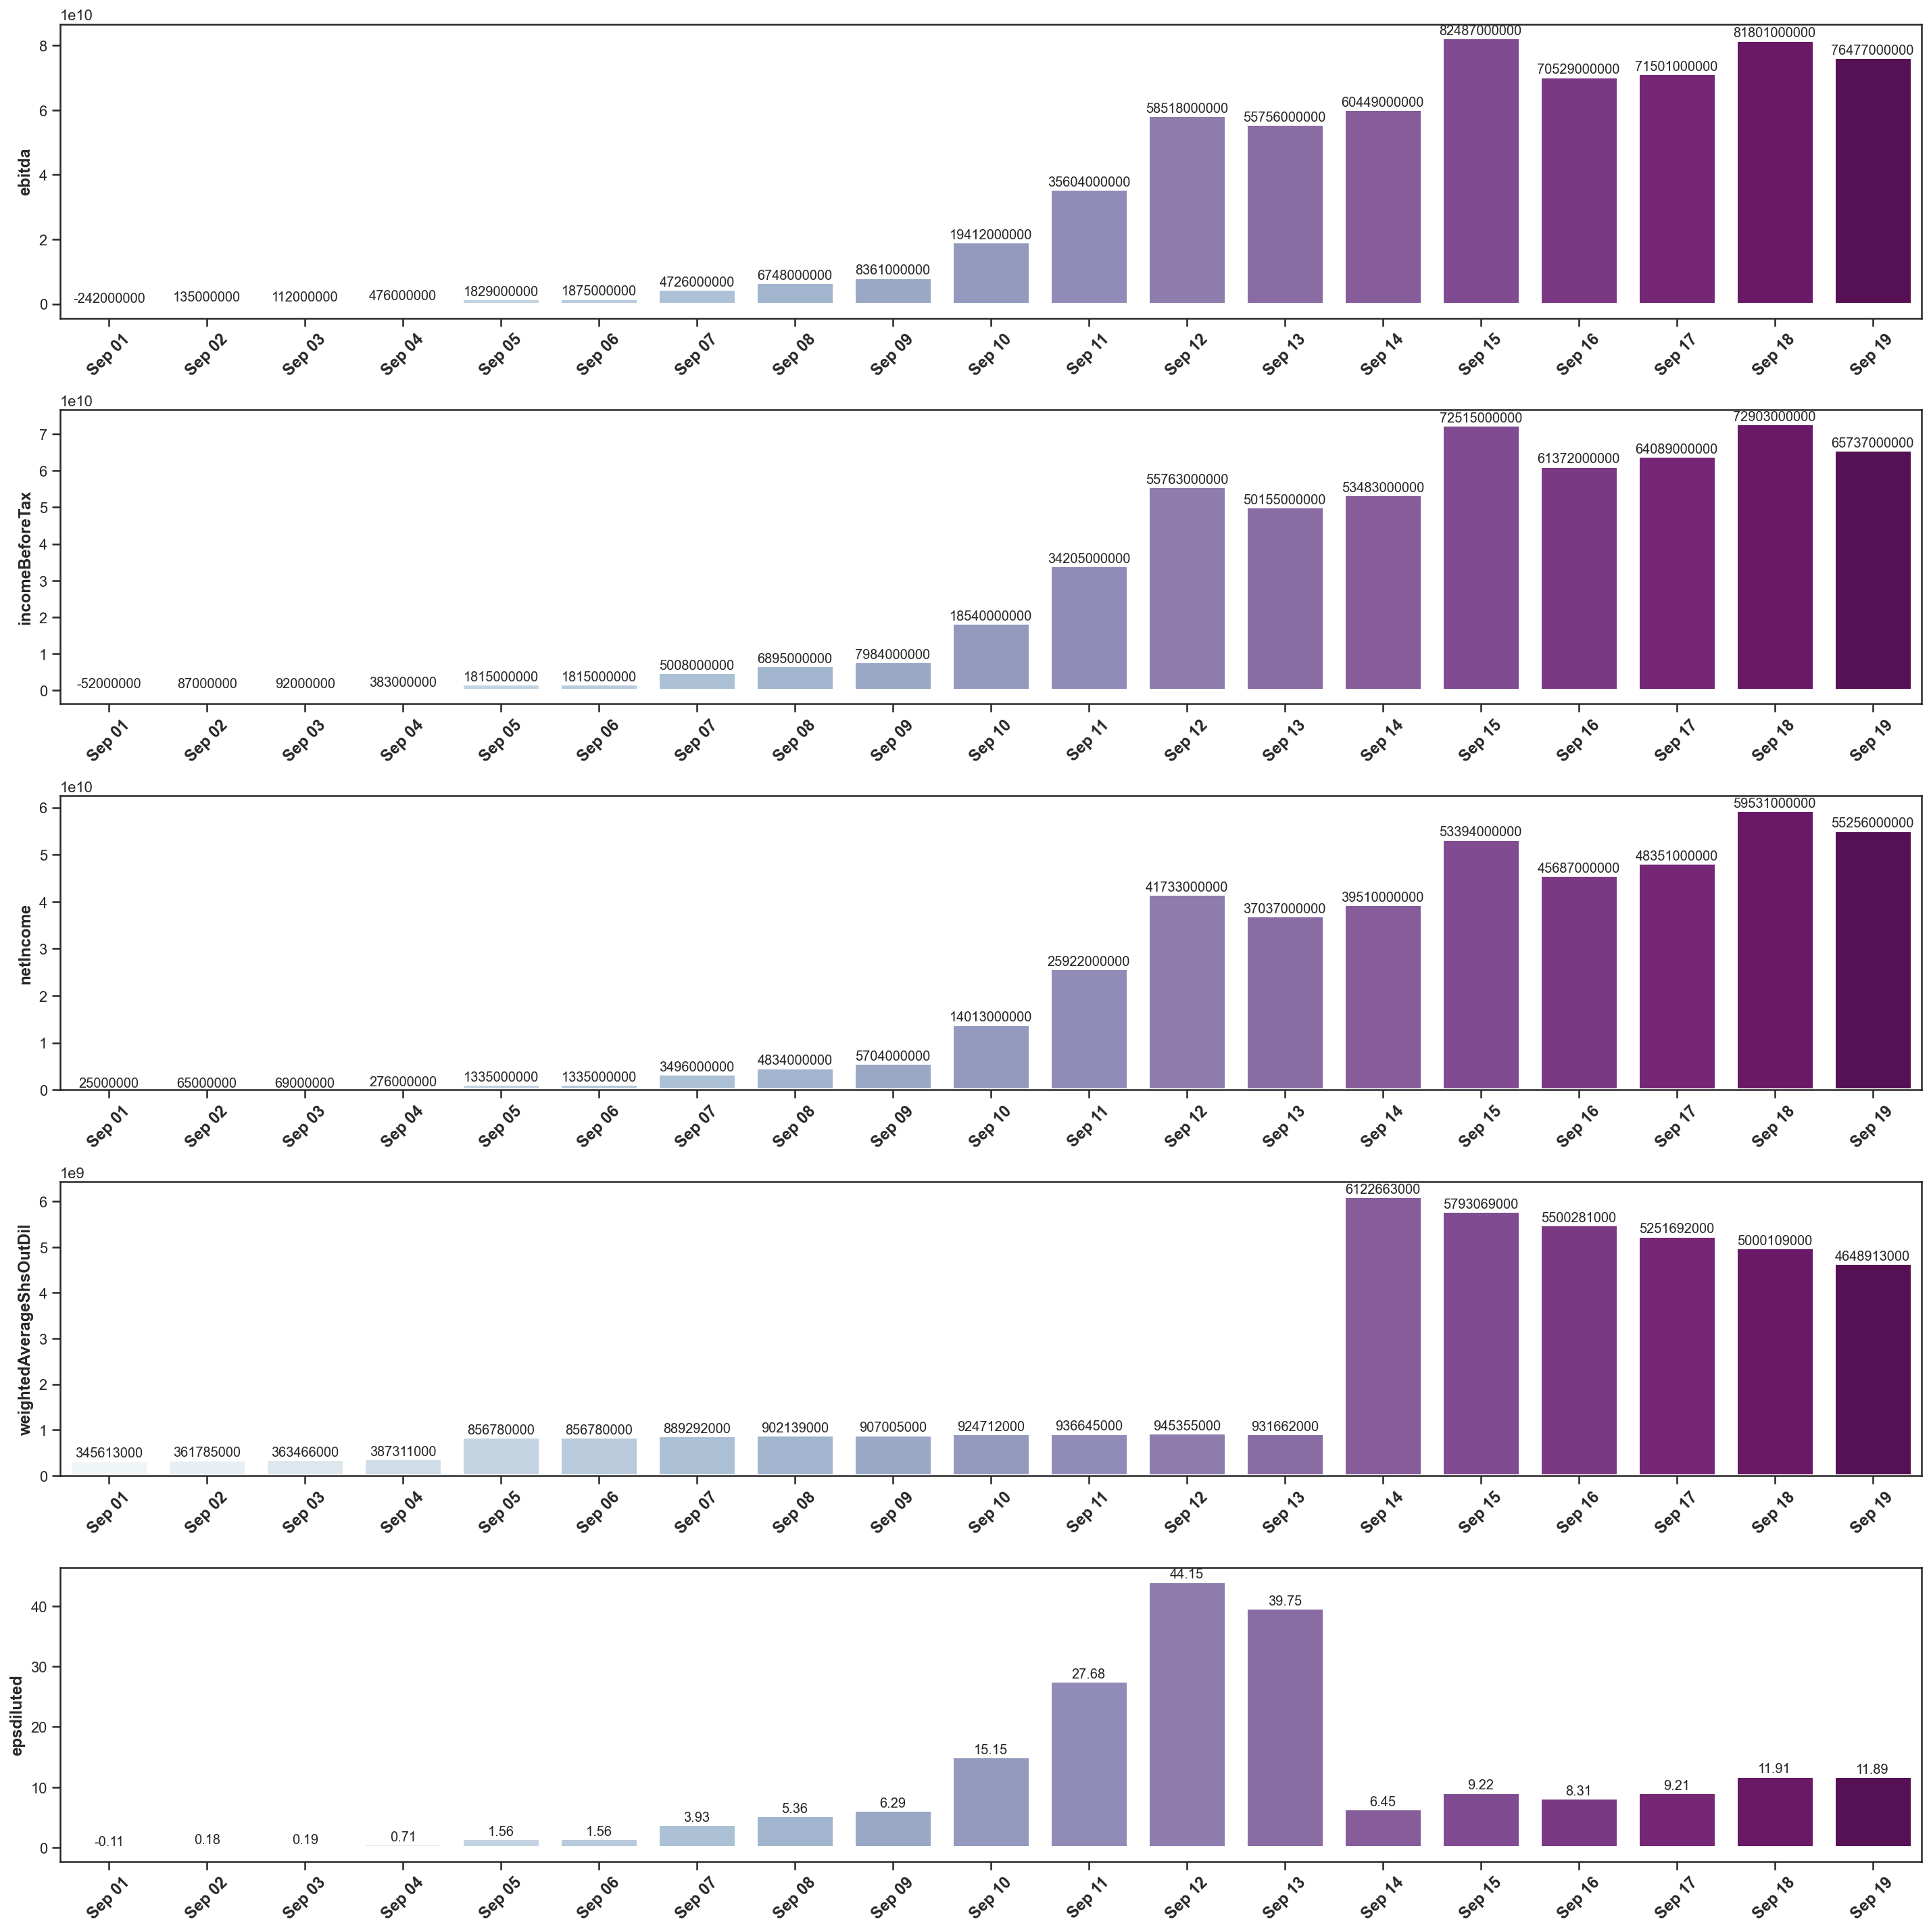

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20,20))
fig.subplots_adjust(hspace =.3, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(["ebitda", 
                         "incomeBeforeTax","netIncome",
                        "weightedAverageShsOutDil", "epsdiluted"]):
    plot=sns.barplot(y=col, x=df.index, data=df, palette ="BuPu", ax=axes[i], linewidth = 2.5)
    plot.set_xticklabels(plot.get_xticklabels(),size= 12, rotation=45, fontweight='bold')
    plot.set_ylabel(col,size= 12, fontweight='bold')
    plot.set_xlabel('')
    for p in plot.patches:
        if 'ratio' in col.lower():
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%s' % str(round(float(p.get_height()),2))[1:], 
                fontsize=10, ha='center', va='bottom')
        elif 'eps' in col.lower():
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%s' % str(round(float(p.get_height()),2)), 
                fontsize=10, ha='center', va='bottom')
        else: 
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%.0f' % float(p.get_height()), 
                fontsize=10, ha='center', va='bottom')
plt.savefig("./stocks/{0}/_Earnings.png".format(stock))
plt.tight_layout();

### Additional Notes 
Source: Waren Buffett and Interpretation of Financial Statements
- Ch 7: Look for **durable** companies with a competitive advantage. Income statement shows profit margins, expenses on R&D to keep competitive advantage alive, etc. **Source of earnings is more important than the earnings itself**
- Ch 8: Revenue doesn't mean you are earning profit
- Ch 9: Investigating the expenses of a business is **important**. 
- Ch 10: Consistently higher gross margin than competitors will have excellent long-term economics (firms will be able to adjust to their costs better than competitors). Higher gross margin comes from the business's competitive advantage which allows the business the freedom to price products and services however they like. **In general >= 40% tend to be companies with durable competitve advantage** (Below 40%, business's are in a competitive industry)
- Gross margin is one of the indicators for businesses, but they are not fail-safe. High gross profit margin can go ashtray by research costs, selling and admin costs, interest costs in debt (operating expenses)
- Ch 12: SGA expenses are **consistent**, because if you SGA expenses increase but your revenue remains the same/decreases
- Ch 13: R&D as a competitive advantage can be risky. Spend money for R&D for new products correlates to SGA expenses (redesigning/updating products then sales programs also need redesign/update) 
- Ch 14: Companies with competitive advantage have lower depreciation costs compared to gross profit (Ex: Cars depreciate faster than Coca cola machinery) 
- Ch 15: companies with a durable competitive advantage often carry little or no interest expense. **In general <= 15% interest payouts/operating income, companies have competitive advantage**. In the sector, the company with lowest ratio of interest payout to operating income tend to have a competitive advantage
- Ch 16: Gain/Loss on Sales Asset and Other should be excluded since these are non recurring events
- Ch 17: Income before tax can be used when understanding how much you are getting when purchasing entire business
- Ch 18: Ensure Income taxes paid match with their SEC filing (if not, company are usually trying to inflate their earnings to look more healthy when not) Companies with long-term competitive advantage don't need to fake their taxes
- Ch 19: Net earnings historical overall upward trend (take into account share repurchasing), higher net earnings / revenue % compared to competitiors. **In general >= 20% they have a competitive advantage. <= 10%, there is fierce competition. Between 10% and 20% is vague** However there are exceptions to this rule such as banks (a high ratio may mean they are slacking off, because banks reinvest their money)
- Ch 20: Earnings per Share historically overall upward trend shows consistent earnings without changing products, company is strong enough for expenditures to increase market share, or financial engineering (share repurchase). Historically decrease or volatile EPS could indicate that company's demand is inconsistent


Research other companies in that sector and compare these percentages as well
